<a href="https://colab.research.google.com/github/sakshamsomani2345/Breast-Cancer-Detection/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')


<Axes: >

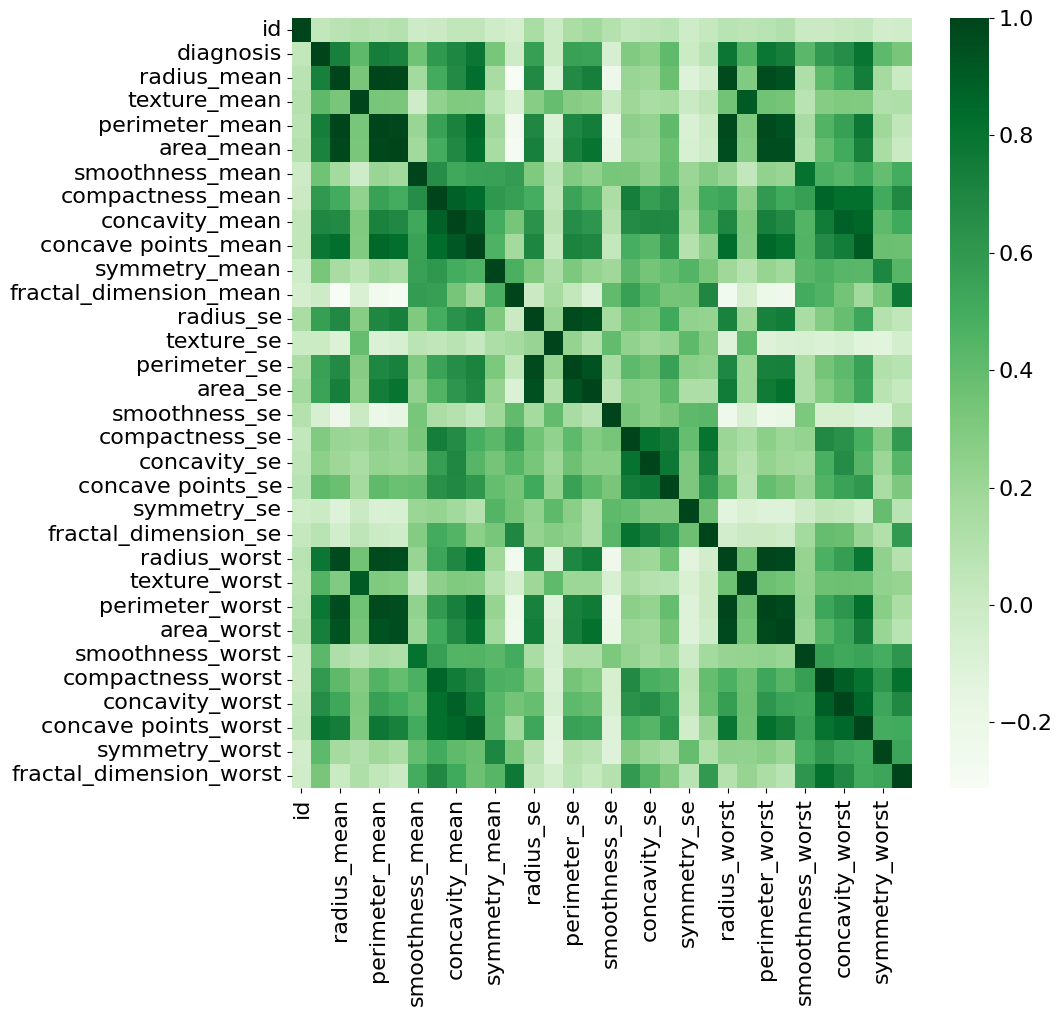

In [ ]:
# df.drop(['Unnamed: 32'],1,inplace=True)
LEncoder = LabelEncoder()
df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])
df
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(data=df.corr(),cmap='Greens')
# sns.heatmap(data=df.corr(),annot=True,fmt='.1f',cmap='Greens')


[Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')]

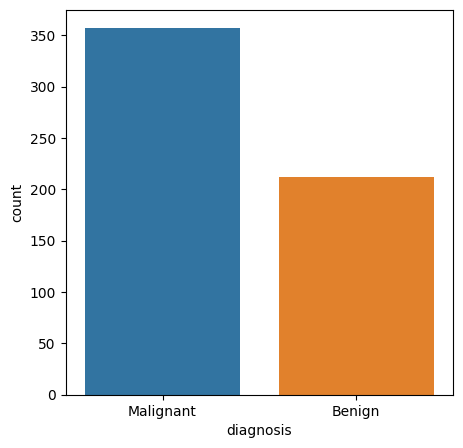

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(x="diagnosis", data=df)
plt.subplot().set_xticklabels(["Malignant", "Benign"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim = 31))
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.fit(X_train, y_train, batch_size=200, epochs=100)


Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.0378 - accuracy: 0.9912
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9912
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.9912
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9912
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9912
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9912
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9912
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9912
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9912
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9912
Epoch 11/100
3/3 [===========

In [ ]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


In [ ]:
loss, accuracy = ann_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9561


In [ ]:
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

Loss in the ANN Model design : 0.1086
Accuracy in the ANN Model design : 94.7368
1.0


<Axes: >

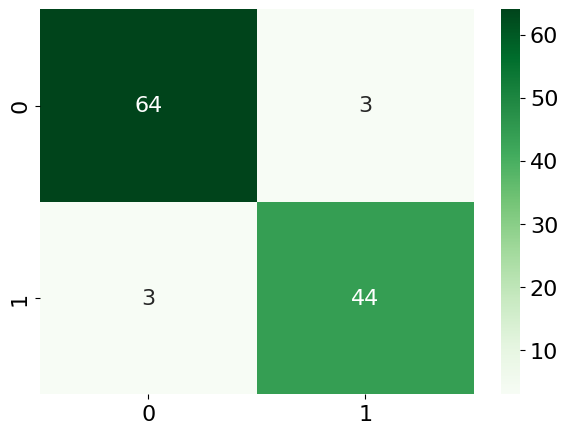

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cm,annot=True,cmap='Greens')

In [ ]:
y_pred_1 = ann_model.predict(X_test)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)
auc_score = roc_auc_score(y_test, y_pred_1)
print("AUC Score:", auc_score)

4/4 [==============================] - 0s 3ms/step
0.9361702127659575
AUC Score: 0.990790727214989


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0455 - accuracy: 0.9890 - val_loss: 0.1225 - val_accuracy: 0.9561
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9890 - val_loss: 0.1232 - val_accuracy: 0.9561
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9890 - val_loss: 0.1240 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9890 - val_loss: 0.1257 - val_accuracy: 0.9561
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9890 - val_loss: 0.1269 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.1281 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9912 - val_loss: 0.1297 - val_accuracy: 0.9561
Epoch 8/100
1

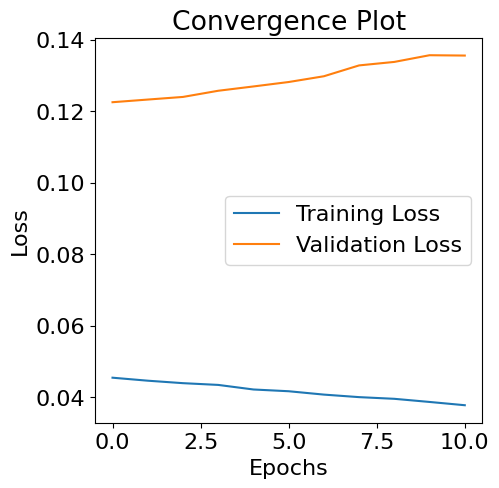

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convergence Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()